the first part is tring to find some birds that there migration trends may have relationship with climates.


Bird types:
1. Long-distance migratory birds: Canada goose NABBP_2023_grp_02.csv

2. short-distance migratory birds: Red-winged Blackbird NABBP_2023_grp_48.csv

3. wetland bird for precipitation and humidity study: mallard NABBP_2023_grp_08.csv

4. land bird for whether study: American Goldfinch NABBP_2023_grp_39.csv

5. possible related to extreme whether: Branta geese including CAGO subspecies, Swans NABBP_2023_grp_03.csv(hail)
Wood Duck NABBP_2023_grp_04.csv (tornado, damage winds, freezing drizzle)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
## 1. Canada goose:long-distance

In [7]:
def bird_data_read(path):
    bird_csv_path = path
    cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']
    df = pd.read_csv(bird_csv_path, usecols = cols)

    print("Columns (label):", df.columns.tolist())
    print(df.head())
    print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

    return df

In [ ]:
path = "../datasets/migration/NABBP_2023_grp_02.csv"
df = bird_data_read(path)

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION LAT_DD  LON_DD
0            7        1960          CA           CA-AB   50.5  -112.5
1            7        1960          CA           CA-AB   50.5  -112.5
2            7        1960          CA           CA-AB   50.5  -112.5
3            7        1960          CA           CA-AB   50.5  -112.5
4            7        1960          CA           CA-AB   50.5  -112.5
Total rows: 5085264, Total columns: 6


In [12]:
def bird_data_plot(df):
    df['LAT_DD'] = pd.to_numeric(df['LAT_DD'], errors='coerce')
    df['LON_DD'] = pd.to_numeric(df['LON_DD'], errors='coerce')

    df['EVENT_YEAR'] = pd.to_numeric(df['EVENT_YEAR'], errors='coerce')
    df.dropna(subset=['EVENT_YEAR'], inplace=True)  
    df['EVENT_YEAR'] = df['EVENT_YEAR'].astype(int)

    df['EVENT_MONTH'] = pd.to_numeric(df['EVENT_MONTH'], errors='coerce')
    df = df[(df['EVENT_MONTH'] >= 1) & (df['EVENT_MONTH'] <= 12)]
    df['EVENT_MONTH'] = df['EVENT_MONTH'].astype(int)

    df['DECADE'] = (df['EVENT_YEAR'] // 10) * 10

    monthly_lat_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
    monthly_lon_data = df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    for decade in monthly_lat_data['DECADE'].unique():
        subset = monthly_lat_data[monthly_lat_data['DECADE'] == decade]
        plt.plot(subset['EVENT_MONTH'], subset['LAT_DD'], label=f"Decade {decade}")

    plt.title('Average Latitude Over Time by Decade')
    plt.xlabel('Month')
    plt.ylabel('Average Latitude')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    for decade in monthly_lon_data['DECADE'].unique():
        subset = monthly_lon_data[monthly_lon_data['DECADE'] == decade]
        plt.plot(subset['EVENT_MONTH'], subset['LON_DD'], label=f"Decade {decade}")

    plt.title('Average Longitude Over Time by Decade')
    plt.xlabel('Month')
    plt.ylabel('Average Longitude')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


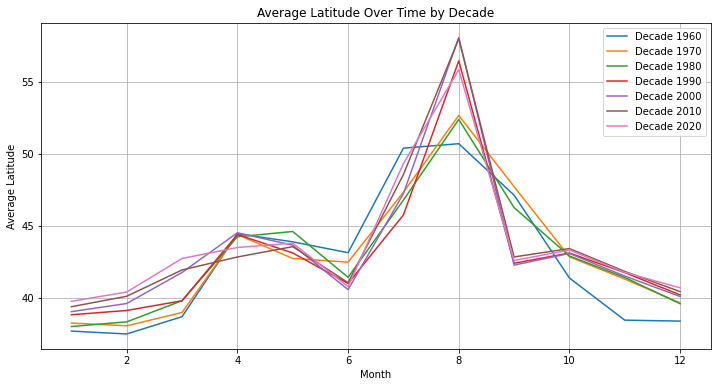

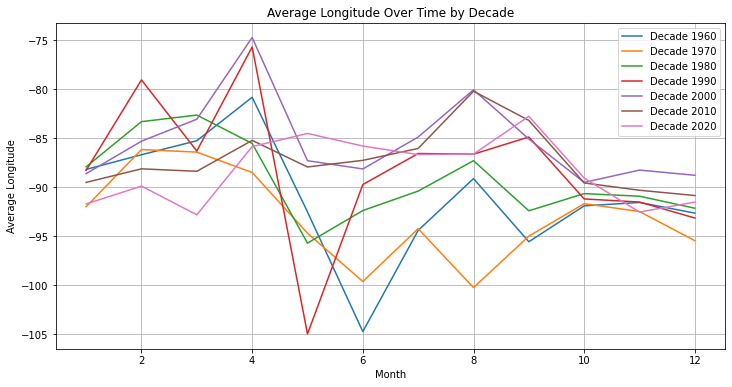

In [13]:
bird_data_plot(df)

we can see from this dataset that Canada goose migrates north in the summer and back after summer(possible related to temperature), 
migrates west betwwen spring(I guess for food).

with decade trande we can see that before 2000, the migration to west is obvious while after 2000, there is nearly no migration from east to west(we may find some possible relations with climate change).

In [ ]:
## 2. short-distance migratory birds: Red-winged Blackbird NABBP_2023_grp_48.csv

In [ ]:
path = "../datasets/migration/NABBP_2023_grp_48.csv"
df = bird_data_read(path)

Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION    LAT_DD     LON_DD
0            3        1962          BS             NaN  25.08333  -77.41667
1            3        1963          MX             NaN  30.75000 -110.91667
2            3        1963          MX             NaN  30.75000 -110.91667
3            4        1963          BS             NaN  25.08333  -77.58333
4            4        1963          MX             NaN  18.58333  -95.58333
Total rows: 845271, Total columns: 6


C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


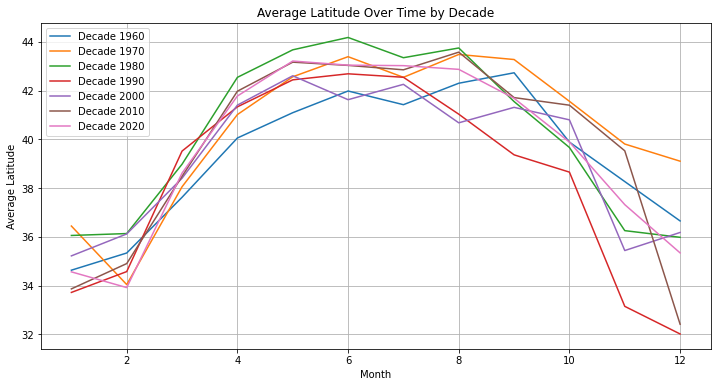

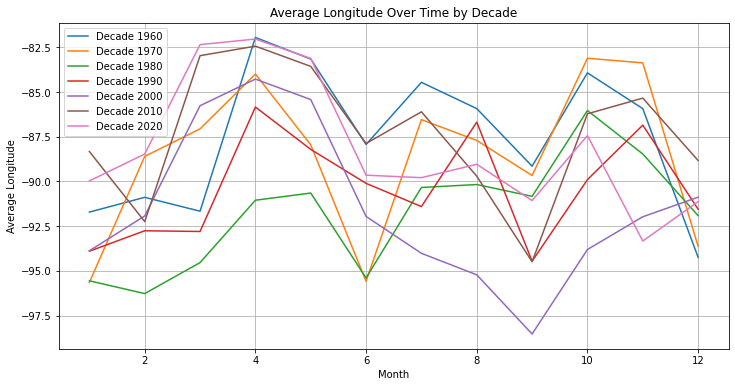

In [15]:
bird_data_plot(df)

In [ ]:
## 3. wetland bird for precipitation and humidity study: mallard NABBP_2023_grp_08.csv

In [ ]:
path = "../datasets/migration/NABBP_2023_grp_08.csv"
df = bird_data_read(path)

Columns (label): ['EVENT_MONTH', 'EVENT_YEAR', 'ISO_COUNTRY', 'ISO_SUBDIVISION', 'LAT_DD', 'LON_DD']
   EVENT_MONTH  EVENT_YEAR ISO_COUNTRY ISO_SUBDIVISION  LAT_DD  LON_DD
0            5        1960          CA           CA-AB    50.5  -112.5
1            5        1960          CA           CA-AB    50.5  -112.5
2            5        1960          CA           CA-AB    50.5  -112.5
3            5        1960          CA           CA-AB    50.5  -112.5
4            5        1960          CA           CA-AB    50.5  -112.5
Total rows: 7720579, Total columns: 6


C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


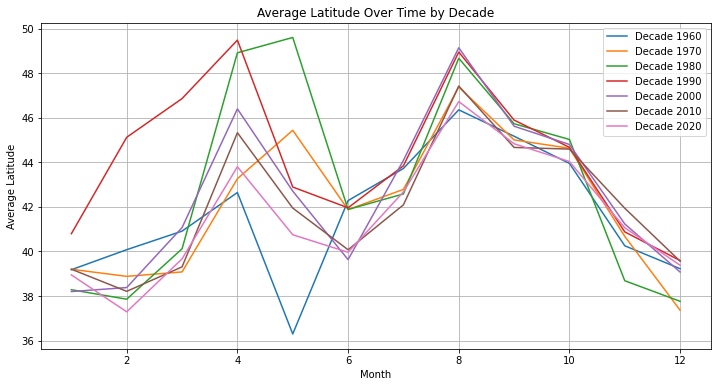

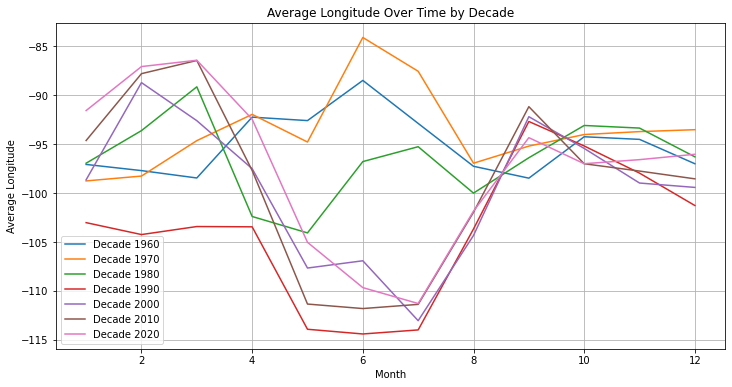

In [17]:
bird_data_plot(df)

the second part is trying to find whether the climate affects and what factors

for stations, we choose four to represent:
1. Grand Junction, Colorado (roughly -108.55 longitude, 39.07 latitude) 


2. Sioux Falls, South Dakota (longitude ~ -96.72, latitude ~ 43.55)


3. Austin Camp, Texas (Longitude ~ -97.74, latitude ~ 30.26)


4. Caribou Weather Forecast Office, Maine (Longitude ~ -67.99, latitude ~ 46.88)



Potential climatic factors:
1. temperature

2. Precipitation and humidity

3. wind

4. extreme climatic event: fog, hail, tornado, damage winds, freezing drizzle

Temperature (range for every month each decade)

In [18]:
def temperature_plot():


    file_paths = ['./weather_data/grand.csv', './weather_data/sioux.csv', './weather_data/austin.csv', './weather_data/caribo.csv']  
    station_names = ['Grand', 'Sioux', 'Austin', 'Caribou']  

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()  

    for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
        df = pd.read_csv(file_path)
        df['DATE'] = pd.to_datetime(df['DATE'])
    
        df['TEMPERATURE'] = (df['TMAX'] + df['TMIN']) / 20.0  
    
        df['YEAR'] = df['DATE'].dt.year
        df['MONTH'] = df['DATE'].dt.month

        df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
        df['DECADE'] = (df['YEAR'] // 10) * 10
    
        monthly_avg_temp = (
            df.groupby(['DECADE', 'MONTH'])['TEMPERATURE']
            .mean()
            .reset_index()
        )
    
        ax = axes[i]
        for decade in monthly_avg_temp['DECADE'].unique():
            subset = monthly_avg_temp[monthly_avg_temp['DECADE'] == decade]
            ax.plot(subset['MONTH'], subset['TEMPERATURE'], label=f"{decade}s")
    
        ax.set_title(station_name)
        ax.set_xlabel('Month')
        ax.set_ylabel('Temperature (°C)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,95,111,113,115,117,119,121,123,125,127,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (17,19,21,23,25,2

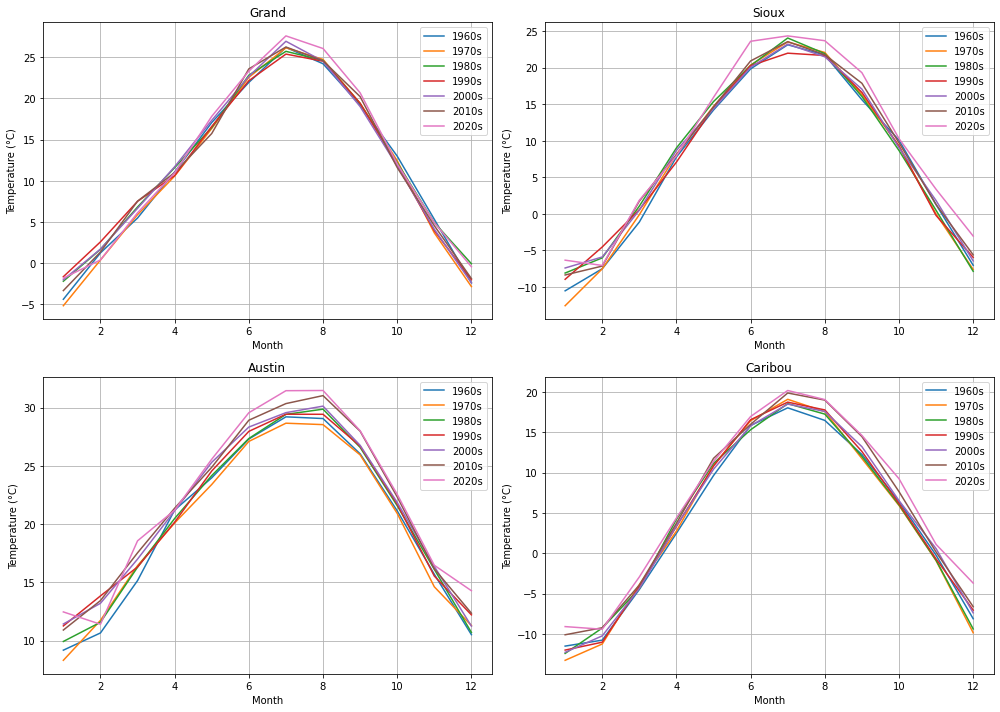

In [19]:
temperature_plot()

Precipitation

In [20]:
def precipitation_plot():
    file_paths = ['./weather_data/grand.csv', './weather_data/sioux.csv', './weather_data/austin.csv', './weather_data/caribo.csv']  
    station_names = ['Grand', 'Sioux', 'Austin', 'Caribou'] 

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
        df = pd.read_csv(file_path)
        df['DATE'] = pd.to_datetime(df['DATE'])
    
        df['PRECIPITATION'] = df['PRCP'] / 10.0
    
        df['YEAR'] = df['DATE'].dt.year
        df['MONTH'] = df['DATE'].dt.month

        df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
        df['DECADE'] = (df['YEAR'] // 10) * 10 

        monthly_avg_precip = (
            df.groupby(['DECADE', 'MONTH'])['PRECIPITATION']
            .mean()
            .reset_index()
        )
        ax = axes[i]
        for decade in monthly_avg_precip['DECADE'].unique():
            subset = monthly_avg_precip[monthly_avg_precip['DECADE'] == decade]
            ax.plot(subset['MONTH'], subset['PRECIPITATION'], label=f"{decade}s")
    
        ax.set_title(f"{station_name} - Average Precipitation")
        ax.set_xlabel('Month')
        ax.set_ylabel('Precipitation (mm)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,95,111,113,115,117,119,121,123,125,127,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (17,19,21,23,25,2

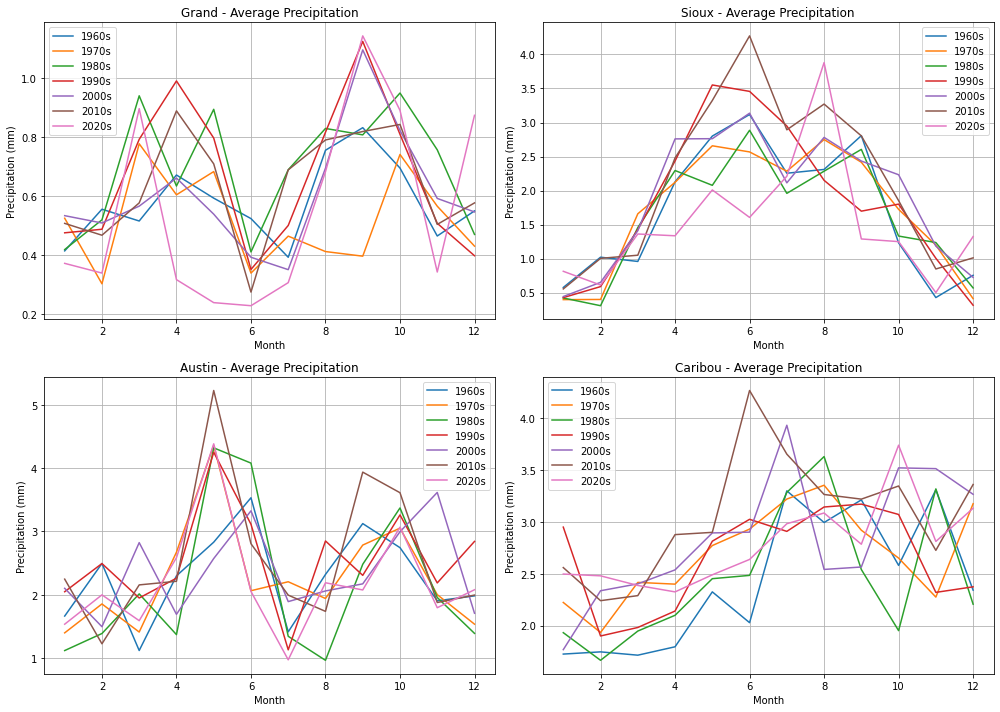

In [21]:
precipitation_plot()

wind speed

In [22]:
def wind_plot():
    file_paths = ['./weather_data/grand.csv', './weather_data/sioux.csv', './weather_data/austin.csv', './weather_data/caribo.csv']  
    station_names = ['Grand', 'Sioux', 'Austin', 'Caribou'] 

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
        df = pd.read_csv(file_path)
        df['DATE'] = pd.to_datetime(df['DATE'])
    
        df['YEAR'] = df['DATE'].dt.year
        df['MONTH'] = df['DATE'].dt.month
        df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
        df['DECADE'] = (df['YEAR'] // 10) * 10

        df['AWND'] = df['AWND'] / 10.0
    
        monthly_avg_wind = (
            df.groupby(['DECADE', 'MONTH'])['AWND']
            .mean()
            .reset_index()
        )
    
        ax = axes[i]
        for decade in monthly_avg_wind['DECADE'].unique():
            subset = monthly_avg_wind[monthly_avg_wind['DECADE'] == decade]
            ax.plot(subset['MONTH'], subset['AWND'], label=f"{decade}s")
    
        ax.set_title(station_name)
        ax.set_xlabel('Month')
        ax.set_ylabel('Average Wind Speed (m/s)')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


special climate check

In [23]:
def special_limate_plot():
    file_paths = ['./weather_data/grand.csv', './weather_data/sioux.csv', './weather_data/austin.csv', './weather_data/caribo.csv']  
    station_names = ['Grand', 'Sioux', 'Austin', 'Caribou']
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, (file_path, station_name) in enumerate(zip(file_paths, station_names)):
        df = pd.read_csv(file_path)
        df['DATE'] = pd.to_datetime(df['DATE'])
    
        df['YEAR'] = df['DATE'].dt.year
        df['MONTH'] = df['DATE'].dt.month
        df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
        df['DECADE'] = (df['YEAR'] // 10) * 10

        # Identify columns starting with 'WT'
        extreme_weather = ['WT01', 'WT04', 'WT05', 'WT10', 'WT11', 'WT15', 'WT17', 'WT18']
        extreme_weather_columns = [col for col in df.columns if col in extreme_weather]

        df['SPECIAL_EVENTS'] = df[extreme_weather_columns].notnull().sum(axis=1)

        extreme_weather_counts = (
            df.groupby(['DECADE', 'MONTH'])['SPECIAL_EVENTS']
            .sum()
            .reset_index()
        )
        ax = axes[i]
        for decade in extreme_weather_counts['DECADE'].unique():
            subset = extreme_weather_counts[extreme_weather_counts['DECADE'] == decade]
            ax.plot(subset['MONTH'], subset['SPECIAL_EVENTS'], label=f"{decade}s")
    
        ax.set_title(station_name)
        ax.set_xlabel('Month')
        ax.set_ylabel('Special Weather Events')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


part3: relationship between migration and climate

In [37]:
# we choose Grand and Canada goose here
def relation():
    df = pd.read_csv("./weather_data/grand.csv")
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['TEMPERATURE'] = (df['TMAX'] + df['TMIN']) / 20.0  
    df['PRECIPITATION'] = df['PRCP'] / 10.0

    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df = df[(df['YEAR'] >= 1960) & (df['YEAR'] <= 2023)]
    df['AWND'] = df['AWND'] / 10.0

    df['DECADE'] = (df['YEAR'] // 10) * 10

    extreme_weather = ['WT01', 'WT04', 'WT05', 'WT10', 'WT11', 'WT15', 'WT17', 'WT18']
    extreme_weather_columns = [col for col in df.columns if col in extreme_weather]

    df['SPECIAL_EVENTS'] = df[extreme_weather_columns].notnull().sum(axis=1)


    monthly_avg_temp = df.groupby(['DECADE', 'MONTH'])['TEMPERATURE'].mean().reset_index()

    monthly_avg_precip = (
            df.groupby(['DECADE', 'MONTH'])['PRECIPITATION']
            .mean()
            .reset_index()
        )
    
    return df, monthly_avg_temp, monthly_avg_precip
    


In [38]:
df, monthly_avg_temp, monthly_avg_precip = relation()

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
def tem_vs_location(monthly_avg_temp, df):
    bird_csv_path = '../datasets/migration/NABBP_2023_grp_02.csv'
    cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']

    bird_df = pd.read_csv(bird_csv_path, usecols = cols)

    bird_df['LAT_DD'] = pd.to_numeric(bird_df['LAT_DD'], errors='coerce')
    bird_df['LON_DD'] = pd.to_numeric(bird_df['LON_DD'], errors='coerce')

    bird_df['EVENT_YEAR'] = pd.to_numeric(bird_df['EVENT_YEAR'], errors='coerce')
    bird_df.dropna(subset=['EVENT_YEAR'], inplace=True)  
    bird_df['EVENT_YEAR'] = bird_df['EVENT_YEAR'].astype(int)

    bird_df['EVENT_MONTH'] = pd.to_numeric(bird_df['EVENT_MONTH'], errors='coerce')
    bird_df = bird_df[(bird_df['EVENT_MONTH'] >= 1) & (bird_df['EVENT_MONTH'] <= 12)]
    bird_df['EVENT_MONTH'] = bird_df['EVENT_MONTH'].astype(int)

    bird_df = bird_df.dropna(subset=['EVENT_YEAR', 'EVENT_MONTH'])
    bird_df['DECADE'] = (bird_df['EVENT_YEAR'] // 10) * 10

    monthly_avg_lat = bird_df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
    monthly_avg_lon = bird_df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

    df['DECADE'] = df['DECADE'].astype(int)
    df['MONTH'] = df['MONTH'].astype(int)
    bird_df['DECADE'] = bird_df['DECADE'].astype(int)
    bird_df['EVENT_MONTH'] = bird_df['EVENT_MONTH'].astype(int)

    merged_lat = pd.merge(monthly_avg_temp, monthly_avg_lat, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')

    X_lat = merged_lat[['TEMPERATURE']]  
    y_lat = merged_lat['LAT_DD']  

    model_lat = LinearRegression()
    model_lat.fit(X_lat, y_lat)

    y_pred_lat = model_lat.predict(X_lat)

    merged_lon = pd.merge(monthly_avg_temp, monthly_avg_lon, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')
    X_lon = merged_lon[['TEMPERATURE']]
    y_lon = merged_lon['LON_DD']

    model_lon = LinearRegression()
    model_lon.fit(X_lon, y_lon)

    y_pred_lon = model_lon.predict(X_lon)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.scatter(X_lat, y_lat, label='Latitude Data points', color='blue', marker='p')
    ax1.plot(X_lat, y_pred_lat, color='red', label='Latitude Regression Line', linewidth=4)
    ax1.set_xlabel('Temperature (°C)')
    ax1.set_ylabel('Latitude')
    ax1.set_title('Relationship Between Temperature and Latitude')
    ax1.legend()
    ax1.grid(True)

    ax2.scatter(X_lon, y_lon, label='Longitude Data points', color='green', marker='x')
    ax2.plot(X_lon, y_pred_lon, color='orange', label='Longitude Regression Line', linewidth=4)
    ax2.set_xlabel('Temperature (°C)')
    ax2.set_ylabel('Longitude')
    ax2.set_title('Relationship Between Temperature and Longitude')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    print(f'Latitude Regression Coefficient: {model_lat.coef_}')
    print(f'Latitude Intercept: {model_lat.intercept_}')
    print(f'Longitude Regression Coefficient: {model_lon.coef_}')
    print(f'Longitude Intercept: {model_lon.intercept_}')

In [ ]:
def preci_vs_location(df, monthly_avg_precip):
    bird_csv_path = '../datasets/migration/NABBP_2023_grp_02.csv'
    cols = ['EVENT_YEAR', 'EVENT_MONTH', 'ISO_COUNTRY', 'ISO_SUBDIVISION','LAT_DD','LON_DD']

    bird_df = pd.read_csv(bird_csv_path, usecols = cols)

    bird_df['LAT_DD'] = pd.to_numeric(bird_df['LAT_DD'], errors='coerce')
    bird_df['LON_DD'] = pd.to_numeric(bird_df['LON_DD'], errors='coerce')

    bird_df['EVENT_YEAR'] = pd.to_numeric(bird_df['EVENT_YEAR'], errors='coerce')
    bird_df.dropna(subset=['EVENT_YEAR'], inplace=True)  
    bird_df['EVENT_YEAR'] = bird_df['EVENT_YEAR'].astype(int)

    bird_df['EVENT_MONTH'] = pd.to_numeric(bird_df['EVENT_MONTH'], errors='coerce')
    bird_df = bird_df[(bird_df['EVENT_MONTH'] >= 1) & (bird_df['EVENT_MONTH'] <= 12)]
    bird_df['EVENT_MONTH'] = bird_df['EVENT_MONTH'].astype(int)

    bird_df = bird_df.dropna(subset=['EVENT_YEAR', 'EVENT_MONTH'])
    bird_df['DECADE'] = (bird_df['EVENT_YEAR'] // 10) * 10

    monthly_avg_lat = bird_df.groupby(['DECADE', 'EVENT_MONTH'])['LAT_DD'].mean().reset_index()
    monthly_avg_lon = bird_df.groupby(['DECADE', 'EVENT_MONTH'])['LON_DD'].mean().reset_index()

    df['DECADE'] = df['DECADE'].astype(int)
    df['MONTH'] = df['MONTH'].astype(int)
    bird_df['DECADE'] = bird_df['DECADE'].astype(int)
    bird_df['EVENT_MONTH'] = bird_df['EVENT_MONTH'].astype(int)
    merged_lat = pd.merge(monthly_avg_precip, monthly_avg_lat, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')

    X_lat = merged_lat[['PRECIPITATION']]  
    y_lat = merged_lat['LAT_DD']  

    model_lat = LinearRegression()
    model_lat.fit(X_lat, y_lat)

    y_pred_lat = model_lat.predict(X_lat)

    merged_lon = pd.merge(monthly_avg_precip, monthly_avg_lon, left_on=['DECADE', 'MONTH'], right_on=['DECADE', 'EVENT_MONTH'], how='inner')
    X_lon = merged_lon[['PRECIPITATION']]
    y_lon = merged_lon['LON_DD']

    model_lon = LinearRegression()
    model_lon.fit(X_lon, y_lon)

    y_pred_lon = model_lon.predict(X_lon)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.scatter(X_lat, y_lat, label='Latitude Data points', color='blue', marker='p')
    ax1.plot(X_lat, y_pred_lat, color='red', label='Latitude Regression Line', linewidth=4)
    ax1.set_xlabel('Precipitation (mm)')
    ax1.set_ylabel('Latitude')
    ax1.set_title('Relationship Between Precipitation (mm) and Latitude')
    ax1.legend()
    ax1.grid(True)

    ax2.scatter(X_lon, y_lon, label='Longitude Data points', color='green', marker='x')
    ax2.plot(X_lon, y_pred_lon, color='orange', label='Longitude Regression Line', linewidth=4)
    ax2.set_xlabel('Precipitation (mm)')
    ax2.set_ylabel('Longitude')
    ax2.set_title('Relationship Between Precipitation (mm) and Longitude')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    print(f'Latitude Regression Coefficient: {model_lat.coef_}')
    print(f'Latitude Intercept: {model_lat.intercept_}')
    print(f'Longitude Regression Coefficient: {model_lon.coef_}')
    print(f'Longitude Intercept: {model_lon.intercept_}')

C:\Users\aaa\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


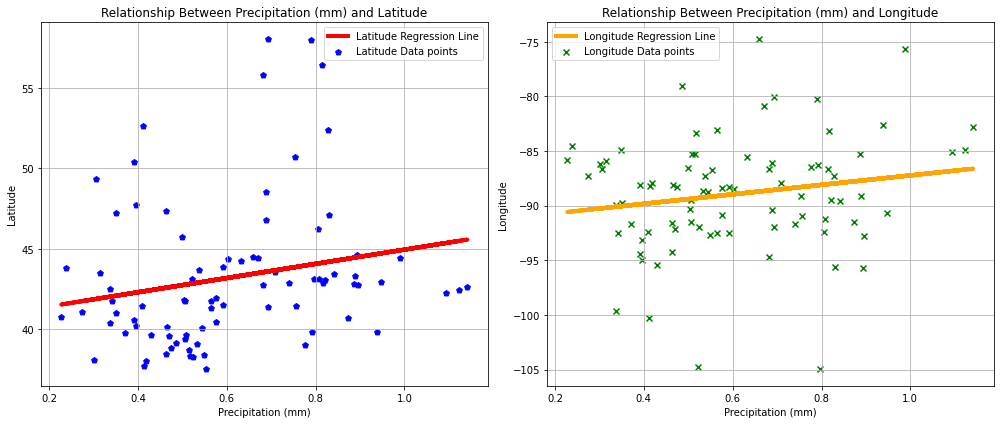

Latitude Regression Coefficient: [4.42145092]
Latitude Intercept: 40.524524166082536
Longitude Regression Coefficient: [4.33429765]
Longitude Intercept: -91.5595461819304


In [47]:
preci_vs_location(df, monthly_avg_precip)